In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
customer_df = pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")
customer_df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [3]:
customer_df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

### Dropping Customer

In [4]:
customer_df2 = customer_df.drop(columns = "Customer")

In [5]:
customer_df2.columns = customer_df2.columns.str.lower().str.replace(' ', '_')

### Removing Outliers

In [9]:

def remove_outliers(df, threshold=1.5, in_columns=customer_df2.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(customer_df2[column],75)
            lower = np.percentile(customer_df2[column],25)
            iqr = upper - lower
            upper_limit = upper + threshold * iqr
            lower_limit = lower - threshold * iqr
            df = df[(df[column]>lower_limit) & (df[column]<upper_limit)]
    return df

In [10]:
customer_df3 = remove_outliers(customer_df2, threshold=3, skip_columns=['number_of_open_complaints', 'total_claim_amount',])
customer_df3

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [11]:
customer_df3["effective_to_date"] = pd.to_datetime(customer_df3["effective_to_date"])

In [12]:
numerical_df = customer_df3.select_dtypes(include = "number")
categorical_df = customer_df3.select_dtypes(exclude = "number")

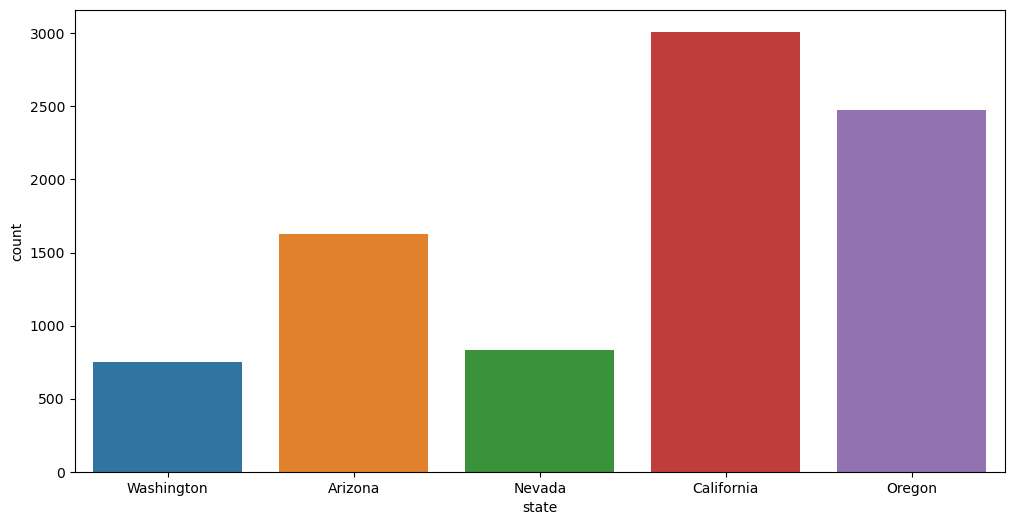

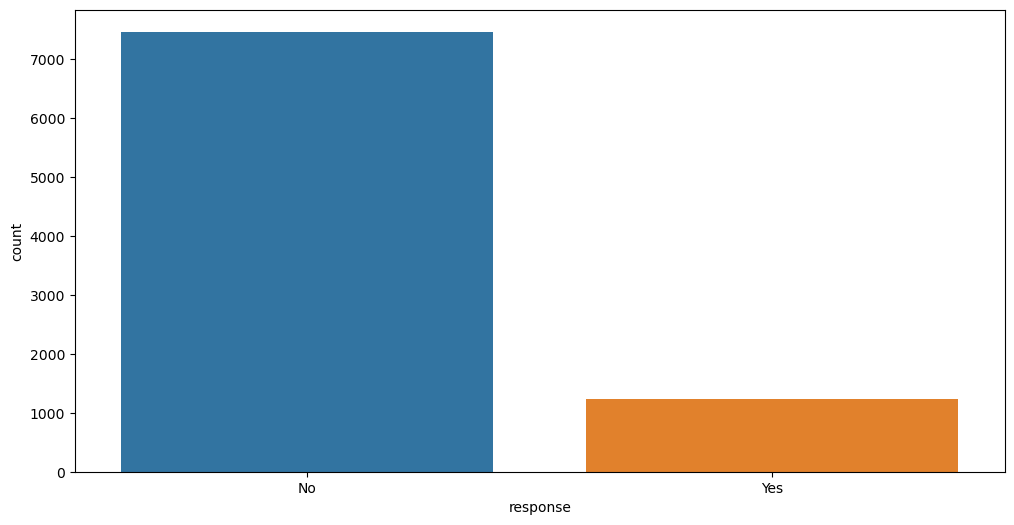

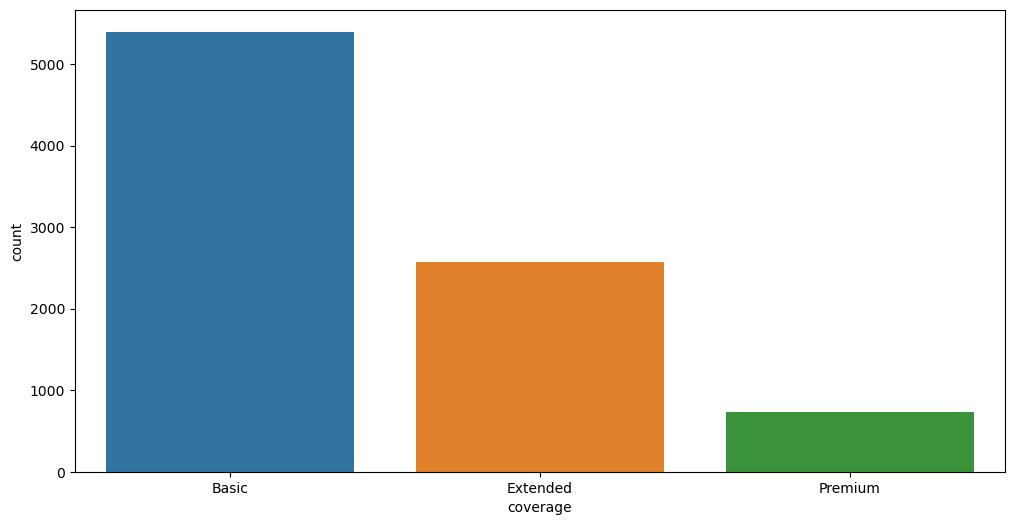

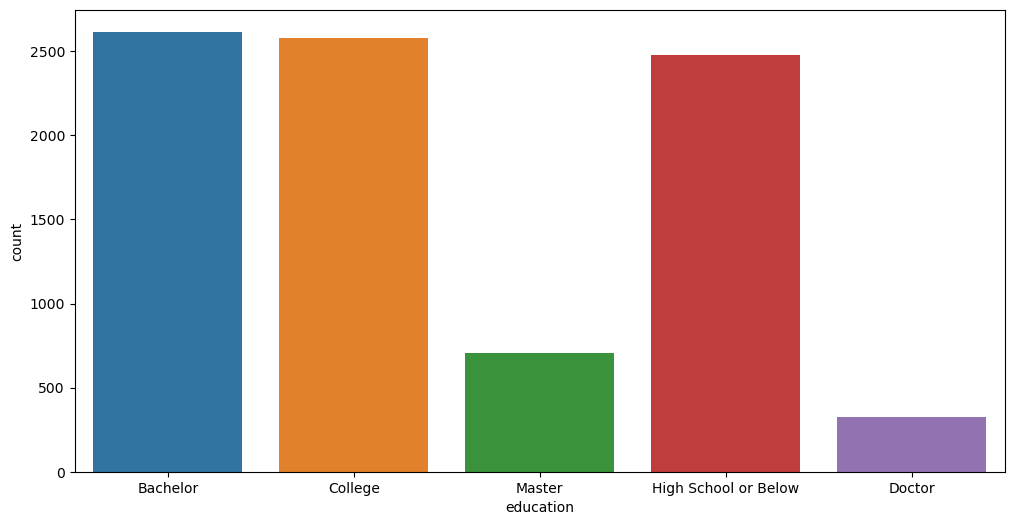

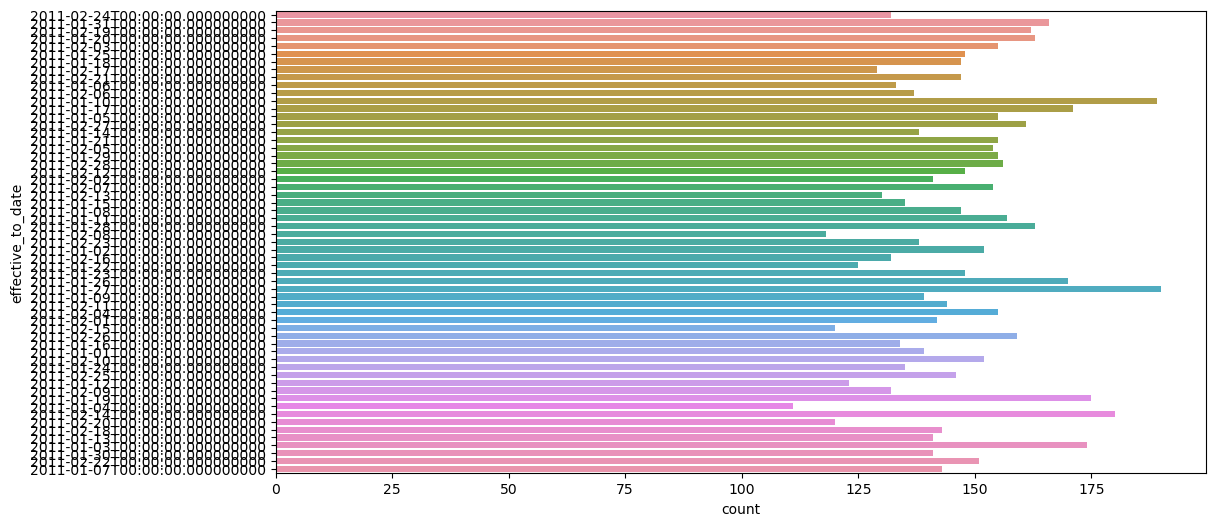

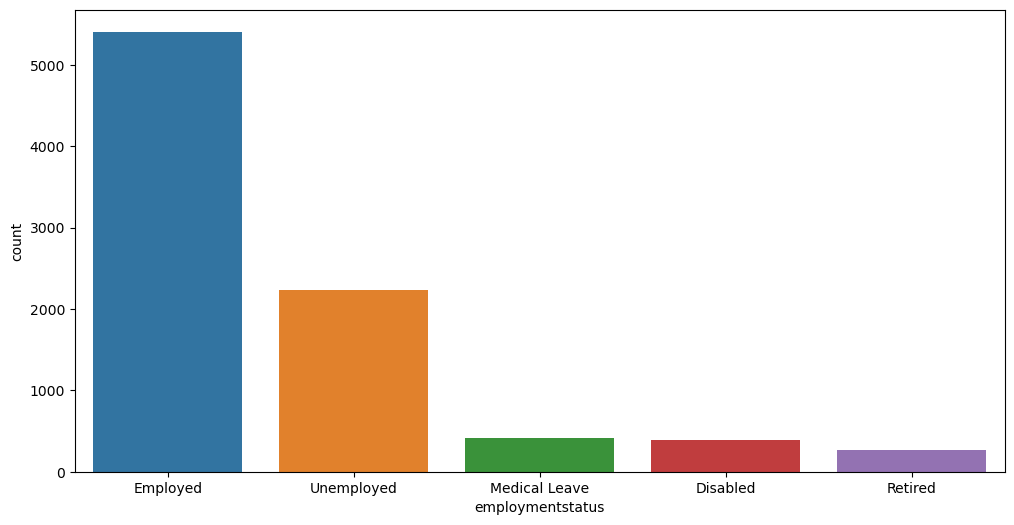

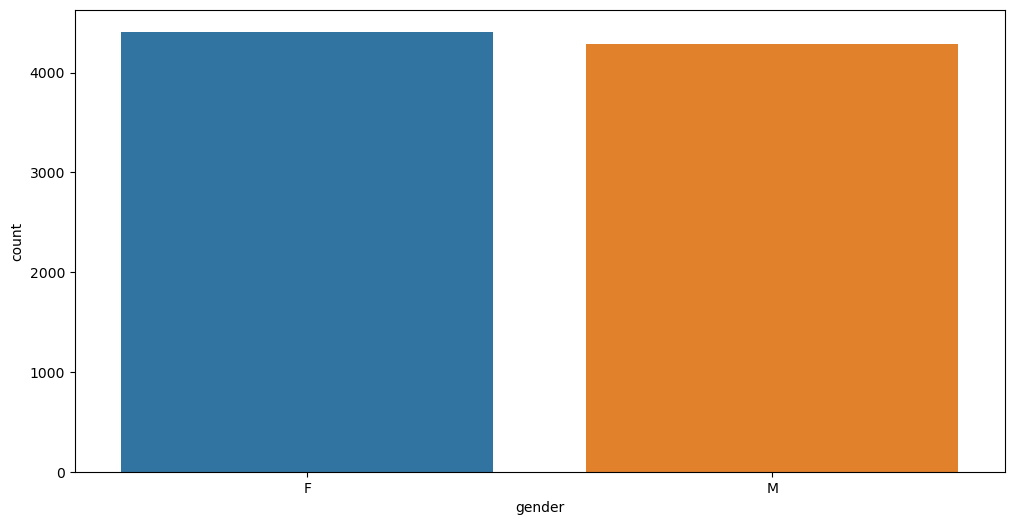

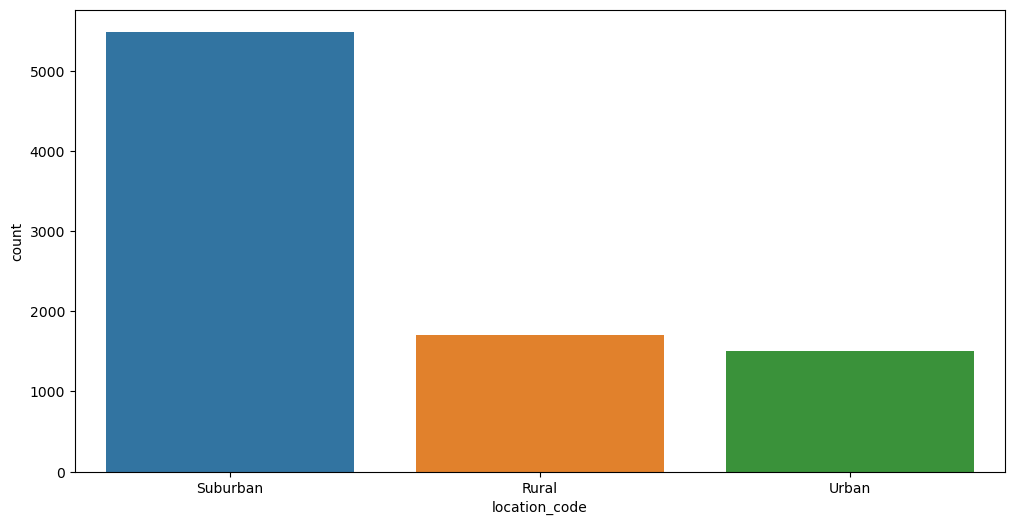

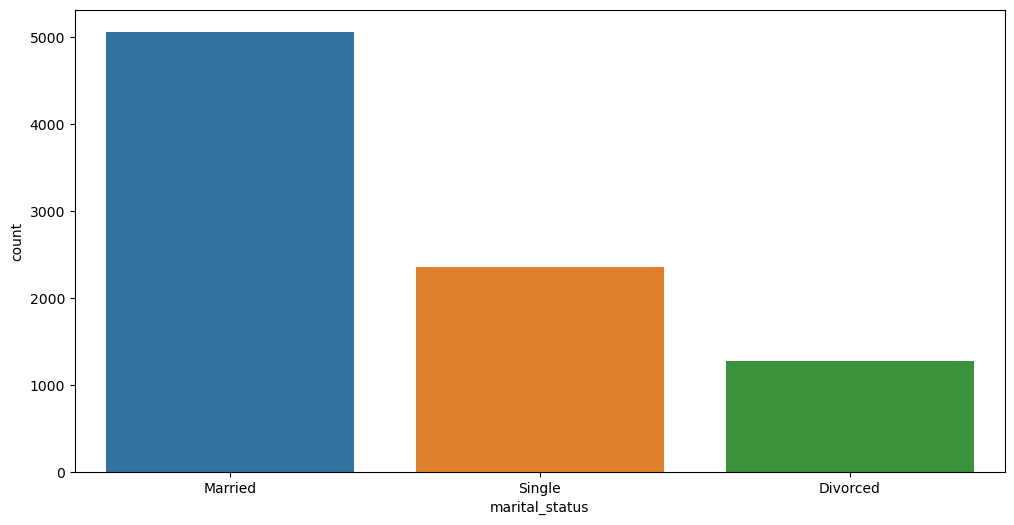

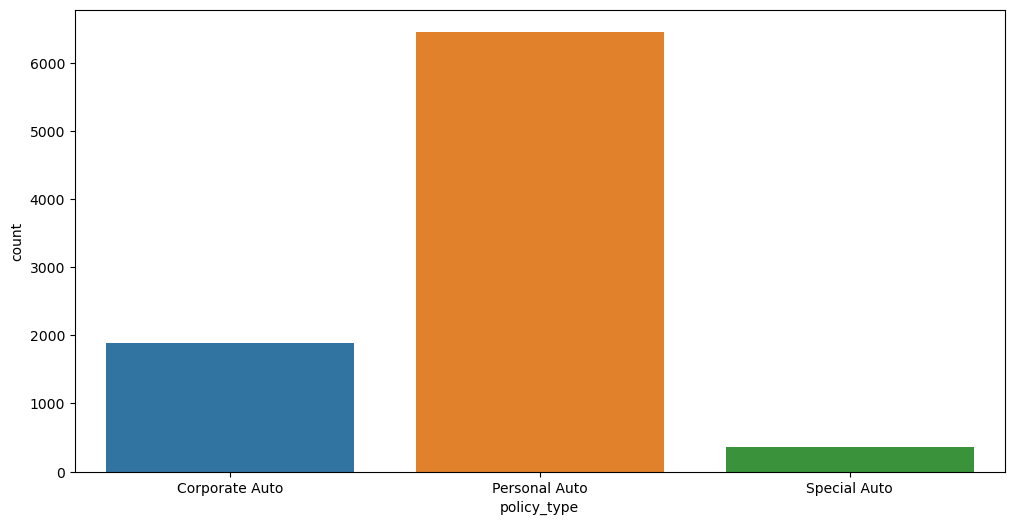

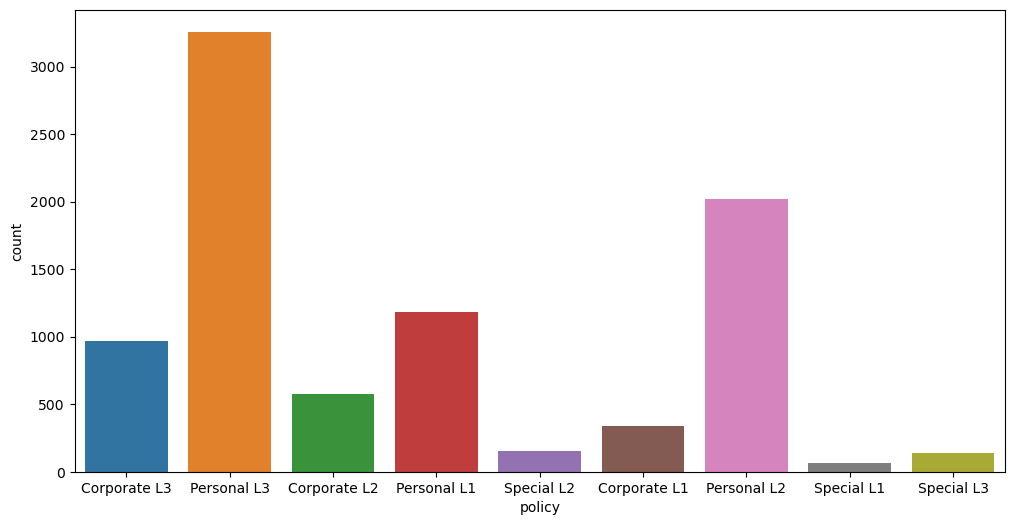

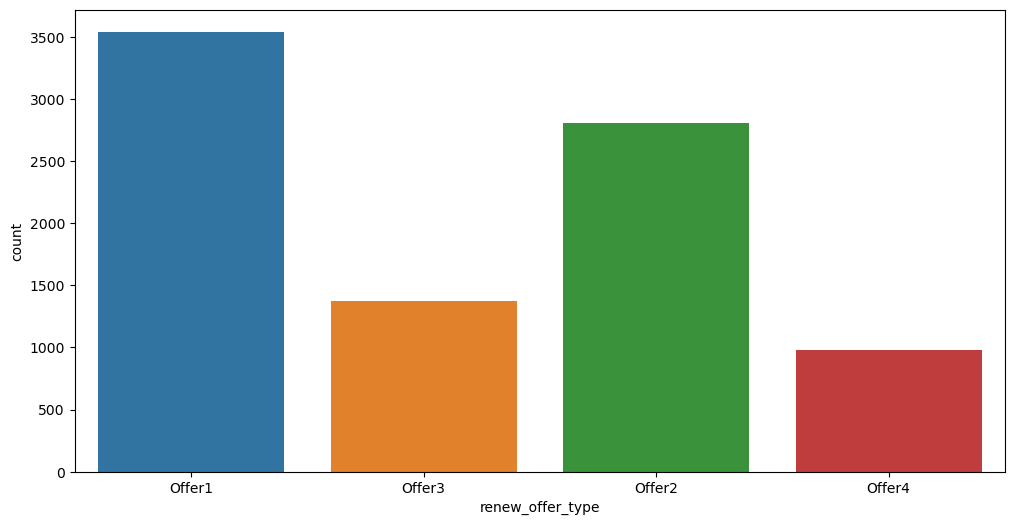

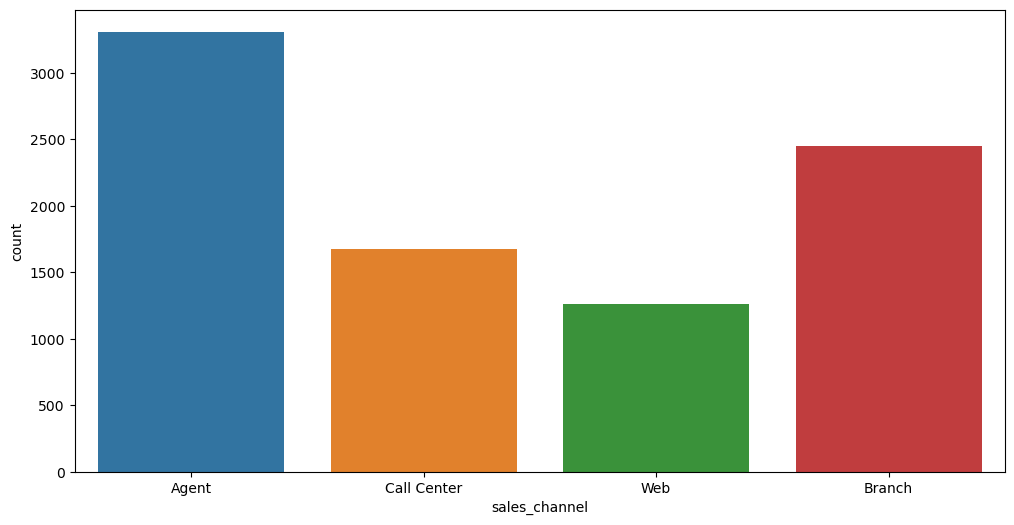

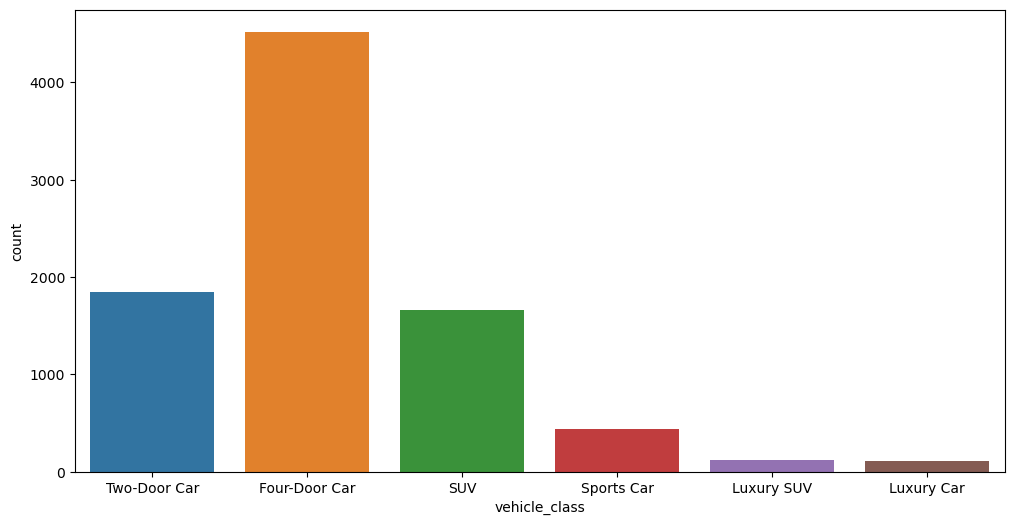

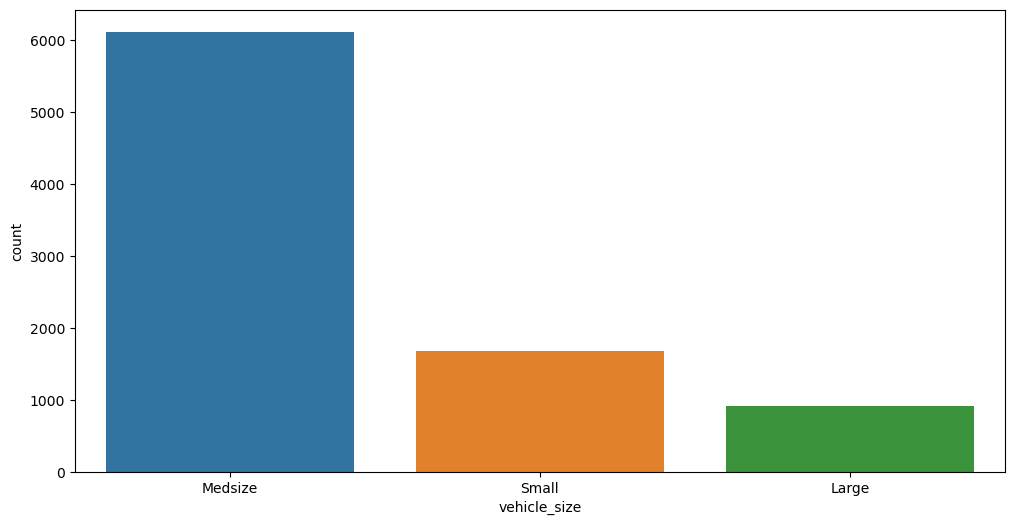

In [39]:
for column in categorical_df.columns:
    if categorical_df[str(column)].nunique()<= 10:
        plt.figure(figsize=(12, 6))
        sns.countplot(x=column, data=categorical_df)
        plt.show()

    else:
        plt.figure(figsize=(12, 6))
        sns.countplot(y=column, data=categorical_df)
        plt.show()

### Normalising

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_normalized = pd.DataFrame(scaler.fit_transform(numerical_df), columns=numerical_df.columns)
numerical_normalized

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0.039493,0.562847,0.047619,0.914286,0.050505,0.0,0.000,0.165321
1,0.231869,0.000000,0.196429,0.371429,0.424242,0.0,0.875,0.486177
2,0.501445,0.487763,0.279762,0.514286,0.383838,0.0,0.125,0.243385
3,0.262273,0.000000,0.267857,0.514286,0.656566,0.0,0.750,0.227661
4,0.041782,0.438443,0.071429,0.342857,0.444444,0.0,0.000,0.059316
...,...,...,...,...,...,...,...,...
8695,0.981404,0.719547,0.071429,0.514286,0.898990,0.0,0.125,0.085144
8696,0.054687,0.216081,0.107143,0.400000,0.282828,0.0,0.000,0.162909
8697,0.285911,0.000000,0.142857,0.257143,0.373737,0.6,0.125,0.339778
8698,0.256733,0.219452,0.208333,0.971429,0.030303,0.0,0.250,0.296984


### Encoding and time variable

In [14]:
categorical_df_encoded= pd.get_dummies(categorical_df)

In [16]:
final_customer_df = pd.concat([numerical_normalized,categorical_df_encoded])

In [18]:
final_customer_df['day'] = final_customer_df['effective_to_date'].dt.dayofweek
final_customer_df['month'] = final_customer_df['effective_to_date'].dt.month
final_customer_df = final_customer_df.drop(columns=['effective_to_date'], axis=1)

In [33]:
final_customer_df= final_customer_df.fillna(0)

In [34]:
final_customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17400 entries, 0 to 9133
Data columns (total 67 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_lifetime_value         17400 non-null  float64
 1   income                          17400 non-null  float64
 2   monthly_premium_auto            17400 non-null  float64
 3   months_since_last_claim         17400 non-null  float64
 4   months_since_policy_inception   17400 non-null  float64
 5   number_of_open_complaints       17400 non-null  float64
 6   number_of_policies              17400 non-null  float64
 7   total_claim_amount              17400 non-null  float64
 8   state_Arizona                   17400 non-null  float64
 9   state_California                17400 non-null  float64
 10  state_Nevada                    17400 non-null  float64
 11  state_Oregon                    17400 non-null  float64
 12  state_Washington                1

### Train Test Split

In [35]:
y = final_customer_df["total_claim_amount"]
X = final_customer_df.drop(['total_claim_amount'],axis=1)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

### Predictions

In [38]:
predictions = model.predict(X_test)
predictions

array([ 0.1583622 ,  0.19490021, -0.00051577, ...,  0.22401283,
        0.18101411,  0.26614103])

### Checking Different Models and Results

In [40]:
def modeling(y, X, models=[], test_size=0.3):
    for model in models:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
        model.fit(X_train, y_train )
        predictions = model.predict(X_test)
        r2 = r2_score(y_test, predictions)
        r2_adj = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
        RMSE = mean_squared_error(y_test, predictions, squared=False)
        MSE = mean_squared_error(y_test, predictions)
        MAE = mean_absolute_error(y_test, predictions)
        print(model, 'metrics are: '), print("R2 =", round(r2,2)), print("R2 adjusted =", round(r2_adj,2)), print("RMSE =", round(RMSE,2)), print("MSE =", round(MSE,2)), print("MAE =", round(MAE,2))
    return predictions, y_test, r2

### Linear Regressor and KNN

In [42]:
from sklearn.neighbors import KNeighborsRegressor
predictions, y_test, r2 = modeling(y, X, models=[LinearRegression(), KNeighborsRegressor(n_neighbors=10)], test_size=0.24)

LinearRegression() metrics are: 
R2 = 0.76
R2 adjusted = 0.76
RMSE = 0.06
MSE = 0.0
MAE = 0.03
KNeighborsRegressor(n_neighbors=10) metrics are: 
R2 = 0.75
R2 adjusted = 0.75
RMSE = 0.06
MSE = 0.0
MAE = 0.03


In [43]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

In [44]:
predictions, y_test, r2 = modeling(y, X, models=[LinearRegression(), KNeighborsRegressor(n_neighbors=10), MLPRegressor(max_iter=100)], test_size=0.24)


LinearRegression() metrics are: 
R2 = 0.76
R2 adjusted = 0.76
RMSE = 0.06
MSE = 0.0
MAE = 0.03
KNeighborsRegressor(n_neighbors=10) metrics are: 
R2 = 0.75
R2 adjusted = 0.75
RMSE = 0.06
MSE = 0.0
MAE = 0.03
MLPRegressor(max_iter=100) metrics are: 
R2 = 0.76
R2 adjusted = 0.76
RMSE = 0.06
MSE = 0.0
MAE = 0.04


In [45]:
#the R2 is almost identical for all models, and they all contain 0 MSE which must a mistake, I would like to do a review of this